In [139]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)],dtype=np.float)
y_seeds = np.array([0,1,1,0])
N = 1000
idxs = np.random.randint(0,4,N)
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [153]:
X += np.random.normal(scale = 0.15,size = X.shape)

In [160]:
class ShallowNeuralNetwork():
    def __init__(self,input_num = 2,hidden_num=3,method = 'normal'):
        if method == 'normal':
            self.w1 = np.random.normal(size=(hidden_num,input_num))
            self.b1 = np.random.normal(size=hidden_num)
            self.w2 = np.random.normal(size=hidden_num)
            self.b2 = np.random.normal(size=1)
        elif method == 'standard_normal':
            self.w1 = np.random.standard_normal(size =(hidden_num,input_num))
            self.b1 = np.random.standard_normal(size=hidden_num)
            self.w2 = np.random.standard_normal(size=hidden_num)
            self.b2 = np.random.standard_normal(size=1)
        else:
            self.w1 = np.random.standard_normal(size =(hidden_num,input_num))
            self.b1 = np.random.standard_normal(size=hidden_num)
            self.w2 = np.random.standard_normal(size=hidden_num)
            self.b2 = np.random.standard_normal(size=1)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def predict(self,X):
        z1 = self.w1@X + self.b1
        a1 = np.tanh(z1)
        z2 = self.w2@a1 + self.b2
        a2 = self.sigmoid(z2)
        return a2,(a1,z1,a2,z2)

In [161]:
model = ShallowNeuralNetwork(input_num=2,hidden_num=3)
a = np.array([1,0])
print(a)
np.expand_dims(a,0)
print(a)

[1 0]
[1 0]


In [162]:
def train(X,Y,model,lr=0.1):
    dw1 = np.zeros_like(model.w1)
    db1 = np.zeros_like(model.b1)
    dw2 = np.zeros_like(model.w2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a2, (a1,z1,a2,z2) = model.predict(x)
        cost -= np.log(a2) if y else np.log(1-a2)
        diff = a2-y
        db2 += diff
        dw2 += diff*a1.T
        
        db1 += model.w2.T*diff@(1-a1**2)
        dw1 += model.w2.T*diff@(1-a1**2)*x
    cost /= m
    model.w1 -= lr*dw1/m
    model.b1 -= lr*db1/m
    model.w2 -= lr*dw2/m
    model.b2 -= lr*db2/m
    return cost

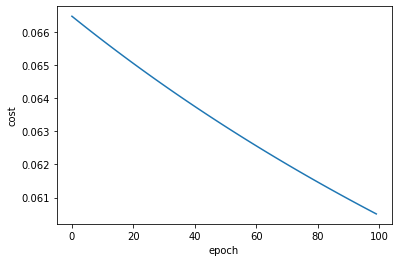

In [168]:
count = []
result = []
for epoch in range(100):
    cost = train(X,Y,model,1.0)
    count.append(epoch)
    result.append(cost)
plt.plot(count,result,label='cost')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [169]:
print(model.predict((1,1))[0].item())
print(model.predict((0,1))[0].item())
print(model.predict((1,0))[0].item())
print(model.predict((0,0))[0].item())

0.02847247462182385
0.9934361686354463
0.997452368318169
0.022473101263392692
